## Problem Statement (as given):
- You are hired by the Government to do an analysis of car crashes. 
- You are provided details of car crashes, among which some people survived and some didn't. 
- You have to help the government in predicting whether a person will survive or not on the basis of the information given in the data set so as to provide insights that will help the government to make stronger laws for car manufacturers to ensure safety measures. Also, find out the important factors on the basis of which you made your predictions.

# Data Dictionary
1. dvcat: factor with levels (estimated impact speeds) 1-9km/h, 10-24, 25-39, 40-54, 55+
2. weight: Observation weights, albeit of uncertain accuracy, designed to account for varying sampling probabilities. (The inverse probability weighting estimator can be used to demonstrate causality when the researcher cannot conduct a controlled experiment but has observed data to model)
3. Survived: factor with levels Survived or not_survived
4. airbag: a factor with levels none or airbag
5. seatbelt: a factor with levels none or belted
6. frontal: a numeric vector; 0 = non-frontal, 1=frontal impact
7. sex: a factor with levels f: Female or m: Male
8. ageOFocc: age of occupant in years
9. yearacc: year of accident
10. yearVeh: Year of model of vehicle; a numeric vector
11. abcat: Did one or more (driver or passenger) airbag(s) deploy? This factor has levels deploy, nodeploy and unavail
12. occRole: a factor with levels driver or pass: passenger
13. deploy: a numeric vector: 0 if an airbag was unavailable or did not deploy; 1 if one or more bags deployed.
14. injSeverity: a numeric vector; 0: none, 1: possible injury, 2: no incapacity, 3: incapacity, 4: killed; 5: unknown, 6: prior death
15. caseid: character, created by pasting together the populations sampling unit, the case number, and the vehicle number. Within each year, use this to uniquely identify the vehicle.

In [86]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


# Read the dataset
df = pd.read_csv('Car_Crash.csv')  

### Descriptive statistics

In [87]:
df

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.078,Not_Survived,none,none,1,m,32,1997,1987,unavail,driver,0,4.0,02:13:02
1,1,25-39,89.627,Not_Survived,airbag,belted,0,f,54,1997,1994,nodeploy,driver,0,4.0,02:17:01
2,2,55+,27.078,Not_Survived,none,belted,1,m,67,1997,1992,unavail,driver,0,4.0,0.138206019
3,3,55+,27.078,Not_Survived,none,belted,1,f,64,1997,1992,unavail,pass,0,4.0,0.138206019
4,4,55+,13.374,Not_Survived,none,none,1,m,23,1997,1986,unavail,driver,0,4.0,04:58:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,11212,25-39,3179.688,survived,none,belted,1,m,17,2002,1985,unavail,driver,0,0.0,82:107:1
11213,11213,Oct-24,71.228,survived,airbag,belted,1,m,54,2002,2002,nodeploy,driver,0,2.0,82:108:2
11214,11214,Oct-24,10.474,survived,airbag,belted,1,f,27,2002,1990,deploy,driver,1,3.0,82:110:1
11215,11215,25-39,10.474,survived,airbag,belted,1,f,18,2002,1999,deploy,driver,1,0.0,82:110:2


### Drop the unnecessary column 

In [88]:
df.drop(["Unnamed: 0"], inplace=True,axis=1)

In [89]:
# Replace the value of dvcat "Oct-24 with 10-24 it may issue with CSV data format"
df = df.replace(to_replace="Oct-24",value="10-24")

In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  int64  
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 1.3+ MB


### Basic Dataset Insight
- The dataset contains 1217 observation and 16 features.
- caseid is a unique identifier of each observation
- There are 2 float, 5 integer and 8 categorical features

In [55]:
df.describe()

,weight,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity
count,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11217.000000,11140.000000
mean,431.405309,0.644022,37.427654,2001.103236,1994.177944,0.389141,1.825583
std,1406.202941,0.478830,18.192429,1.056805,5.658704,0.487577,1.378535
min,0.000000,0.000000,16.000000,1997.000000,1953.000000,0.000000,0.000000
25%,28.292000,0.000000,22.000000,2001.000000,1991.000000,0.000000,1.000000
50%,82.195000,1.000000,33.000000,2001.000000,1995.000000,0.000000,2.000000
75%,324.056000,1.000000,48.000000,2002.000000,1999.000000,1.000000,3.000000
max,31694.040000,1.000000,97.000000,2002.000000,2003.000000,1.000000,5.000000


In [12]:
# Null value condition check
print("\nNull Value Condition Check:")
print(df.isnull().sum())


Null Value Condition Check:
dvcat           0
weight          0
Survived        0
airbag          0
seatbelt        0
frontal         0
sex             0
ageOFocc        0
yearacc         0
yearVeh         0
abcat           0
occRole         0
deploy          0
injSeverity    77
caseid          0
dtype: int64



### Inference on null values


In [20]:

print("\nInference on Null Values:")
print("Null values can indicate missing information in the dataset. Depending on the significance and extent of missing data, further steps like imputation or removal may be required.")
print("injSeverity is the only fearure having ***0.7%*** of Null values in the provided dataset")



Inference on Null Values:
Null values can indicate missing information in the dataset. Depending on the significance and extent of missing data, further steps like imputation or removal may be required.
injSeverity is the only fearure having ***0.7%*** of Null values in the provided dataset


### Univariate analysis

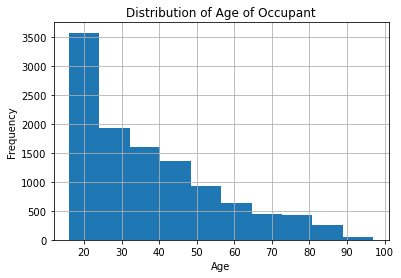

In [23]:
# Histogram of Age of Occupant
df['ageOFocc'].hist()
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age of Occupant')
plt.show()

- The distribution of car crashes among different age groups provides valuable insights into the involvement of specific age demographics in accidents. Based on the given information, here are some possible insights:

1. High Incidence among Young Drivers: The fact that there are 3,500 cases involving occupants under the age of 20 suggests a relatively high incidence of car crashes among young drivers. This highlights the importance of targeting road safety education and awareness programs towards this age group. Implementing stricter licensing requirements, providing driver training programs, and promoting safe driving practices among young drivers can help reduce the number of accidents.

2. Focus on Early Adulthood Age Group: With 2,000 cases involving occupants aged 21 to 30, it indicates that early adulthood is a significant period where individuals are prone to car crashes. This finding suggests the need for tailored interventions that address the specific challenges faced by young adults, such as distracted driving, risk-taking behavior, and lack of experience. Enhancing driver education programs, promoting defensive driving techniques, and raising awareness about the consequences of unsafe driving behaviors can be effective strategies in this age group.

3. Continuing Risk in the 31-40 Age Range: The presence of 1,500 cases involving occupants aged 31 to 40 suggests that car crash risks persist into adulthood. This insight emphasizes the importance of ongoing driver safety initiatives, even beyond the early adulthood phase. Encouraging defensive driving practices, providing refresher courses for experienced drivers, and promoting awareness of changing road conditions and technologies can contribute to reducing accidents in this age range.

4. Targeted Interventions: By understanding the distribution of car crashes across age groups, policymakers and safety organizations can develop targeted interventions. For example, creating campaigns tailored to young drivers can focus on the specific risks they face, such as distractions from mobile devices or peer pressure. Similarly, initiatives for adults aged 31-40 can address issues like driver fatigue due to long work hours or juggling family responsibilities.

5. Allocation of Resources: The distribution of car crashes across different age groups can guide the allocation of resources and investments in road safety measures. For instance, based on the number of cases, additional resources can be directed towards implementing safety technologies in vehicles popular among young drivers or improving road infrastructure in areas with high accident rates involving individuals in their 30s.

- These insights highlight the importance of understanding the age distribution of car crashes and tailoring interventions to address the specific needs and challenges faced by different age groups. It is crucial to combine this information with additional analysis and context from the dataset to develop comprehensive and effective strategies for improving road safety.

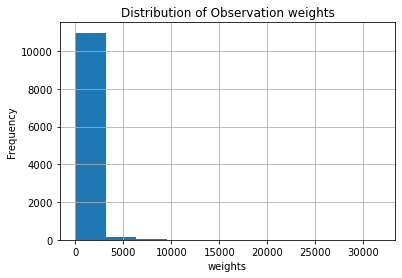

In [25]:
# Histogram of Observation weights
df['weight'].hist()
plt.xlabel('weights')
plt.ylabel('Frequency')
plt.title('Distribution of Observation weights')
plt.show()

- The observation weights distribution in the range of 0 to 30000, with a significant frequency of 11000 instances falling within the 0 to 5000 range, provides insights into the importance and representation of individual observations in the dataset. Here are some potential implications:

1. Varying Sampling Probabilities: The observation weights are designed to account for varying sampling probabilities. The presence of a wide range of weights suggests that the dataset may have been collected using different sampling strategies or methodologies. Some observations may have higher weights, indicating that they are more representative of the population or carry more significance in the analysis.

2. Weighted Analysis: The use of observation weights allows for the application of statistical techniques that account for the sampling design. Researchers can employ techniques like inverse probability weighting to adjust the impact of each observation in the analysis and obtain more accurate estimates or make unbiased inferences about the population.

3. Importance of Individual Observations: Observations with higher weights, particularly those falling within the 0 to 5000 range with a frequency of 11000, indicate the presence of influential or critical cases in the dataset. These cases may represent rare events, instances of particular interest, or have a higher impact on the analysis due to their sampling weight. Analyzing and understanding these cases can provide valuable insights into specific scenarios or subgroups within the dataset.

4. Effect on Statistical Inferences: The distribution of observation weights may affect the precision and generalizability of statistical inferences drawn from the dataset. Researchers should account for the weights during analysis to ensure that results accurately reflect the underlying population and avoid potential biases caused by unequal sampling probabilities.

5. Data Quality and Representativeness: The observation weights can also serve as an indicator of data quality and representativeness. Researchers should examine the weighting distribution to assess if any particular range or group of observations is overrepresented or underrepresented. Large weights or extreme values might warrant further investigation to ensure the validity and reliability of the dataset.

- Understanding the distribution of observation weights helps researchers and analysts appropriately handle and interpret the data. It allows for more robust statistical analyses, enables the identification of influential cases, and ensures accurate representation of the population of interest.

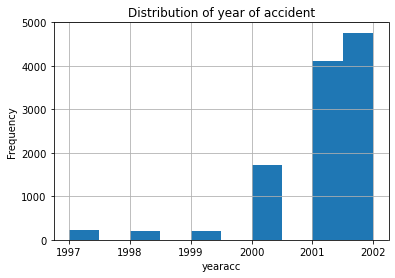

In [31]:
# Histogram of Year of accident
df['yearacc'].hist()
plt.xlabel('yearacc')
plt.ylabel('Frequency')
plt.title('Distribution of year of accident')
plt.show()

- Based on the information that 9000 cases were reported between the years 2000 and 2002, the limited time frame provides insights specific to that period. Here are some potential insights:

1. Snapshot of Car Accidents: The dataset captures a snapshot of most car accidents reported specifically between 2000 and 2002. It allows for analysis and understanding of the characteristics and factors associated with accidents during that time period.

2. Temporal Comparison: By comparing the number of reported cases between 2000 and 2002, you can assess whether there were any significant changes or trends in car accidents during those years. For example, if there is a noticeable increase or decrease in accidents between the two years, it may indicate changes in driving behavior, road infrastructure, or other external factors that influenced accident rates.

3. Analysis of Factors: With a specific time frame, researchers can focus on analyzing the factors contributing to car accidents during that period. This analysis can include variables such as driver age, vehicle types, road conditions, and other relevant features available in the dataset. Identifying the key factors associated with accidents during this time frame can inform targeted interventions and policies.

4. Evaluation of Safety Measures: The dataset covering 2000 and 2002 allows for evaluating the effectiveness of safety measures implemented during that period. By analyzing accident data before and after the implementation of specific safety interventions, policymakers can assess whether the measures had the desired impact in reducing accidents or mitigating their severity.

5. Long-Term Impact: While the dataset captures a limited time frame, it can still provide insights into the potential long-term impact of accidents occurring between 2000 and 2002. This can be especially relevant for studying factors such as long-term injuries, disabilities, or the economic and social consequences resulting from accidents during that period.

- It's important to note that the insights derived from this specific time frame should be considered in the context of broader trends and analysis covering a more extensive period. Understanding the dataset's limitations and conducting additional analysis on a more comprehensive dataset can provide a more accurate and robust understanding of car accidents and their underlying factors.

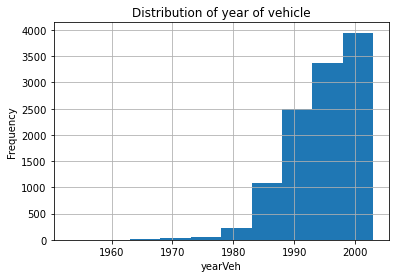

In [32]:
# Histogram of Year of vehicle
df['yearVeh'].hist()
plt.xlabel('yearVeh')
plt.ylabel('Frequency')
plt.title('Distribution of year of vehicle')
plt.show()

- The distribution of vehicle manufacturing years within the dataset, ranging from 1960 to 2000, with 80% of the values falling between 1990 and 2000, provides several potential insights:

1. Age of Vehicles: The dataset predominantly includes vehicles manufactured between 1990 and 2000. This indicates that the dataset primarily focuses on car accidents involving vehicles that are relatively newer, with an average age of 10 to 20 years at the time of the accidents.

2. Technological Features: The concentration of vehicles manufactured in the 1990s and early 2000s suggests that the dataset captures a period when automotive technology was advancing rapidly. This timeframe witnessed the introduction of various safety features such as airbags, anti-lock braking systems (ABS), and improved structural designs. Analyzing accidents involving vehicles from this era can provide insights into the effectiveness of these technological advancements in reducing accident severity.

3. Maintenance and Wear: The distribution of vehicle manufacturing years can indirectly reflect the maintenance and wear characteristics of the vehicles involved in the accidents. Older vehicles may have higher chances of mechanical failures or worn-out safety components, potentially contributing to the severity of accidents. This information can guide policymakers in formulating regulations focused on vehicle maintenance and ensuring the safety of older vehicles still on the road.

4. Recall and Safety Campaigns: The predominance of vehicles manufactured between 1990 and 2000 could indicate a period when certain vehicle models had higher incident rates or safety issues. Analyzing accidents involving specific vehicle makes and models from this time frame can help identify patterns or associations with recalls, safety campaigns, or manufacturing defects that may have contributed to the accidents. This insight can inform vehicle manufacturers, regulators, and safety organizations in addressing specific issues related to those vehicles.

5. Data Limitation: It's important to recognize that the dataset's concentration on vehicles manufactured between 1990 and 2000 might limit the generalizability of the findings to current vehicles on the road. As automotive technology has evolved significantly since then, the dataset might not accurately represent the safety features and performance of modern vehicles. Care should be taken when extrapolating findings from this dataset to the current vehicle population.

- These insights demonstrate the value of analyzing accidents involving vehicles from a specific manufacturing period. However, to gain a comprehensive understanding of car accidents and safety measures, it is advisable to supplement this analysis with more recent data that encompasses a broader range of vehicle manufacturing years.

### Bivariate Analysis

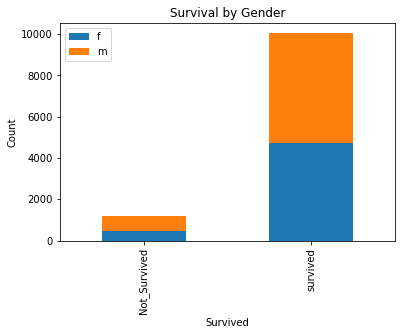

In [33]:
# Bar plot of Survival by Gender
survival_gender = df.groupby(['Survived', 'sex']).size().unstack()
survival_gender.plot(kind='bar', stacked=True)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival by Gender')
plt.legend()
plt.show()

- The gender distribution within the dataset, with 5169 females and 6048 males, and the corresponding survival information (464 females and 716 males did not survive) provide some potential business insights:

1. Gender Disparity in Survival: The data shows that a higher number of males did not survive car crashes compared to females. This insight indicates a potential gender disparity in survival rates and suggests the need for further investigation into the underlying reasons. Understanding the factors contributing to the higher fatality rate among males can help in developing targeted interventions and safety measures to reduce the gender gap in survival outcomes.

2. Impact of Safety Measures: The dataset allows for analyzing the effectiveness of safety measures based on gender. By comparing survival rates among males and females, it is possible to evaluate the impact of safety features, such as seatbelts or airbags, in mitigating injuries and improving survival chances. This analysis can guide car manufacturers and policymakers in designing and implementing gender-inclusive safety features that cater to the specific needs and vulnerabilities of both males and females.

3. Driver Behavior and Risk-Taking: The difference in survival rates between males and females may also reflect variations in driver behavior and risk-taking tendencies. Males, on average, may engage in riskier driving behaviors, such as higher speeds or more aggressive driving, which can increase the likelihood of severe accidents. This insight highlights the importance of promoting safe driving practices and awareness campaigns targeting risky driving behaviors that disproportionately affect males.

4. Gender-Specific Education and Awareness: The disparity in survival rates based on gender underscores the significance of gender-specific education and awareness programs. Tailoring educational initiatives to address the unique risks and challenges faced by both males and females can enhance road safety outcomes. These programs can include educating males about responsible driving habits and promoting awareness among females regarding self-protection measures during accidents.

5. Improving Vehicle Safety: Analyzing the survival outcomes by gender can inform car manufacturers about the need to develop vehicles that provide equal protection to both males and females. This may involve considering physiological and anatomical differences when designing safety features or conducting gender-specific crash tests to ensure that safety measures are effective for all occupants.

- It's important to note that these insights are based on the available gender and survival information within the dataset. Additional analysis considering other relevant factors, such as age, crash severity, or other demographic variables, would provide a more comprehensive understanding of the gender disparities and facilitate more targeted interventions and policies.

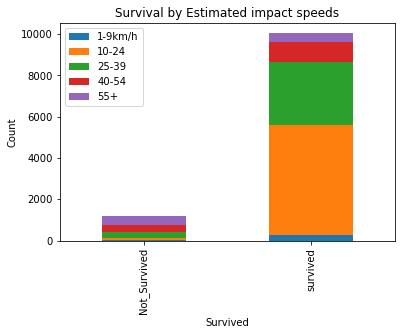

In [46]:
# Bar plot of Survival by Gender
survival_gender = df.groupby(['Survived', 'dvcat']).size().unstack()
survival_gender.plot(kind='bar', stacked=True)
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival by Estimated impact speeds')
plt.legend()
plt.show()

- The distribution of estimated impact speeds within the dataset, with varying levels and corresponding survival information, provides some potential business insights:

1. Impact Speeds and Severity: The distribution of impact speeds across different ranges indicates the severity of car crashes. The higher the speed range, the greater the potential for severe accidents and adverse outcomes. This insight underscores the importance of speed reduction measures and enforcement to mitigate the severity of accidents and improve survival chances.

2. High Survival Rates at Lower Speeds: The data shows that the number of non-survivors decreases as impact speeds decrease. This suggests that accidents occurring at lower speeds (1-9 km/h) have a higher likelihood of survival. This insight emphasizes the significance of speed limits, road safety regulations, and initiatives promoting responsible driving behavior to prevent high-speed collisions and minimize the risk of fatalities.

3. Focus on Intermediate Speed Ranges: The levels with the highest number of cases (10-24 km/h and 25-39 km/h) also exhibit a relatively higher number of non-survivors. This indicates the importance of addressing safety measures for accidents occurring at these intermediate speed ranges. Efforts could include improving vehicle crashworthiness, enhancing occupant protection systems, and promoting awareness campaigns on the risks associated with moderate-speed collisions.

4. Safety Measures for High-Speed Collisions: Although the number of cases in the highest speed range (55+ km/h) is comparatively lower, the survival rate remains a concern. This suggests the need for stricter enforcement of speed limits and more robust safety measures to mitigate the severity of high-speed collisions. Interventions such as advanced driver assistance systems (ADAS) and crash avoidance technologies can play a vital role in preventing accidents or minimizing their impact at high speeds.

5. Continuous Improvement: The distribution of non-survivors across different impact speed ranges can guide ongoing efforts to improve vehicle safety standards and design. By analyzing accidents at various speeds, car manufacturers and policymakers can identify areas for improvement, such as crash energy management systems, advanced restraint systems, and structural enhancements to increase occupant protection and survival rates.

- These insights highlight the significance of impact speeds in determining accident severity and survival outcomes. They underscore the importance of implementing speed control measures, promoting responsible driving behavior, and continually advancing vehicle safety technologies to reduce the risk of fatal accidents.

### Exploratory Data Analysis

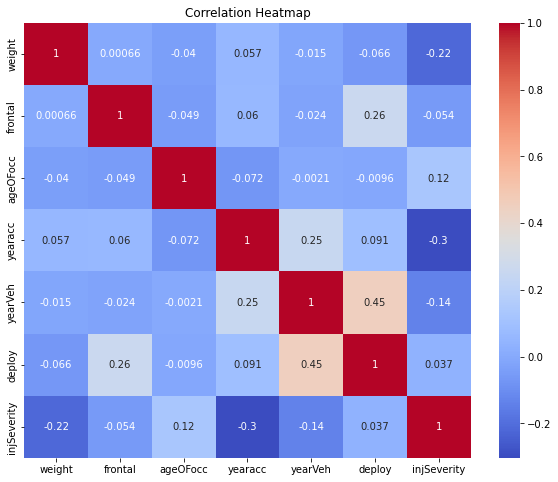

In [58]:
#Correlation Heatmap
correlation = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

- The provided correlation matrix shows the correlations between different features in the dataset. Here are some potential insights based on the correlations:

1. Frontal Impact and Deployment: There is a positive correlation of 0.26 between the "frontal" feature (indicating a frontal impact) and the "deploy" feature (indicating airbag deployment). This suggests that frontal impacts are more likely to result in airbag deployment. This insight highlights the effectiveness of airbag systems in mitigating the impact of frontal collisions.

2. Injury Severity and Year of Accident: There is a negative correlation of -0.30 between the "injSeverity" feature (indicating injury severity) and the "yearacc" feature (indicating the year of the accident). This suggests that over time, injury severity may have decreased. This could be attributed to advancements in vehicle safety technology, improved emergency response systems, or enhanced medical care.

3. Vehicle Year and Deployment: The "yearVeh" feature (indicating the year of the vehicle model) has a positive correlation of 0.45 with the "deploy" feature. This implies that more recent vehicle models are more likely to have airbag deployment systems. This finding indicates the importance of vehicle advancements in safety features over time.

4. Weight and Injury Severity: There is a negative correlation of -0.22 between the "weight" feature (observation weight) and the "injSeverity" feature. This suggests that heavier vehicles may be associated with lower injury severity. The weight of a vehicle can influence its crashworthiness and ability to absorb impact forces, which can contribute to reducing the severity of injuries.

5. Year of Vehicle and Year of Accident: The "yearVeh" feature has a positive correlation of 0.25 with the "yearacc" feature. This indicates that the year of the vehicle model is positively associated with the year of the accident. It implies that more recent accidents tend to involve more recent vehicle models. This information can be useful for understanding the dynamics of car accidents over time and the changing characteristics of vehicles involved in accidents.

- It's important to note that correlation does not imply causation, and further analysis is required to determine the underlying relationships between these features. Additionally, the correlation matrix does not include all the features from the dataset, so there may be additional insights to explore by examining the correlations with other variables.

### Encode the data (having string values) for Modelling

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11217 entries, 0 to 11216
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   dvcat        11217 non-null  object 
 1   weight       11217 non-null  float64
 2   Survived     11217 non-null  object 
 3   airbag       11217 non-null  object 
 4   seatbelt     11217 non-null  object 
 5   frontal      11217 non-null  int64  
 6   sex          11217 non-null  object 
 7   ageOFocc     11217 non-null  int64  
 8   yearacc      11217 non-null  int64  
 9   yearVeh      11217 non-null  int64  
 10  abcat        11217 non-null  object 
 11  occRole      11217 non-null  object 
 12  deploy       11217 non-null  int64  
 13  injSeverity  11140 non-null  float64
 14  caseid       11217 non-null  object 
dtypes: float64(2), int64(5), object(8)
memory usage: 1.3+ MB


### Impute Nan values

In [98]:
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, columns=['dvcat', 'airbag','seatbelt', 'sex', 'abcat', 'occRole'])

In [99]:
### Drop case id column

In [100]:
df_encoded.drop("caseid",axis=1,inplace=True)

In [101]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
le = LabelEncoder()

# Label encode the 'Survived' column
df_encoded['Survived'] = le.fit_transform(df_encoded['Survived'])

In [102]:
df_encoded

,weight,Survived,frontal,ageOFocc,yearacc,yearVeh,deploy,injSeverity,dvcat_1-9km/h,dvcat_10-24,...,airbag_none,seatbelt_belted,seatbelt_none,sex_f,sex_m,abcat_deploy,abcat_nodeploy,abcat_unavail,occRole_driver,occRole_pass
0,27.078,0,1,32,1997,1987,0,4.0,0,0,...,1,0,1,0,1,0,0,1,1,0
1,89.627,0,0,54,1997,1994,0,4.0,0,0,...,0,1,0,1,0,0,1,0,1,0
2,27.078,0,1,67,1997,1992,0,4.0,0,0,...,1,1,0,0,1,0,0,1,1,0
3,27.078,0,1,64,1997,1992,0,4.0,0,0,...,1,1,0,1,0,0,0,1,0,1
4,13.374,0,1,23,1997,1986,0,4.0,0,0,...,1,0,1,0,1,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11212,3179.688,1,1,17,2002,1985,0,0.0,0,0,...,1,1,0,0,1,0,0,1,1,0
11213,71.228,1,1,54,2002,2002,0,2.0,0,1,...,0,1,0,0,1,0,1,0,1,0
11214,10.474,1,1,27,2002,1990,1,3.0,0,1,...,0,1,0,1,0,1,0,0,1,0
11215,10.474,1,1,18,2002,1999,1,0.0,0,0,...,0,1,0,1,0,1,0,0,1,0


-  Data Split: Split the data into train and test (70:30)

In [103]:
### Impute Nan values

In [104]:
# Median imputation
median_value = df_encoded['injSeverity'].median()
df_encoded['injSeverity'] = df_encoded['injSeverity'].fillna(median_value)

In [105]:
from sklearn.model_selection import train_test_split

# Splitting the encoded DataFrame into features and target variable
X = df_encoded.drop('Survived', axis=1)  # Features
y = df_encoded['Survived']  # Target variable

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

### Logestic Regression Model

In [106]:
from sklearn.linear_model import LogisticRegression

# Create a logistic regression model
logreg = LogisticRegression()

# Train the model on the training data
logreg.fit(X_train, y_train)

# Predict on the testing data
y_pred = logreg.predict(X_test)

### LDA Model

In [107]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Create an LDA model
lda = LinearDiscriminantAnalysis()

# Train the model on the training data
lda.fit(X_train, y_train)

# Predict on the testing data
y_pred = lda.predict(X_test)

### Accuracy

In [108]:
from sklearn.metrics import accuracy_score

# Accuracy on train set
train_accuracy_logreg = accuracy_score(y_train, logreg.predict(X_train))
train_accuracy_lda = accuracy_score(y_train, lda.predict(X_train))

# Accuracy on test set
test_accuracy_logreg = accuracy_score(y_test, logreg.predict(X_test))
test_accuracy_lda = accuracy_score(y_test, lda.predict(X_test))

print("train_accuracy_logreg :", train_accuracy_logreg.round(2))
print("train_accuracy_lda :", train_accuracy_lda.round(2))
print("test_accuracy_logreg :", test_accuracy_logreg.round(2))
print("test_accuracy_lda :", test_accuracy_lda.round(2))

train_accuracy_logreg : 0.98
train_accuracy_lda : 0.96
test_accuracy_logreg : 0.98
test_accuracy_lda : 0.95


- Based on the provided accuracy scores for the logistic regression model and linear discriminant analysis (LDA) model on the train and test sets, here are some possible inferences:

1. Model Performance:
   - Logistic Regression: The logistic regression model achieves high accuracy on both the train and test sets, with accuracies of 0.98 for both.
   - Linear Discriminant Analysis: The LDA model also performs well, but slightly lower compared to logistic regression. It achieves an accuracy of 0.96 on the train set and 0.95 on the test set.

2. Generalization:
   - Both models demonstrate good generalization performance, as the accuracy scores on the test set are close to or on par with the accuracy scores on the train set.
   - The small difference in accuracy between the train and test sets suggests that neither model is significantly overfitting the training data.

3. Comparative Performance:
   - Logistic Regression vs. LDA: The logistic regression model outperforms the LDA model in terms of accuracy on both the train and test sets.
   - Logistic regression achieves a slightly higher accuracy than LDA, indicating that it may have a better ability to discriminate between the positive and negative classes in the data.

4. Consideration of Other Metrics:
   - While accuracy is an essential metric, it is advisable to consider other metrics such as precision, recall, and the ROC AUC score to obtain a more comprehensive evaluation of model performance.
   - The ROC AUC score, as well as the ROC curves, can provide insights into the models' ability to distinguish between the positive and negative classes, which may further differentiate their performance.

- It's important to note that these inferences are based solely on the provided accuracy scores and may not capture the complete performance picture. It's recommended to further evaluate the models using additional metrics and conduct a thorough analysis to make more robust conclusions about their effectiveness in the given context.

### Confusion Matrix

<Figure size 576x432 with 0 Axes>

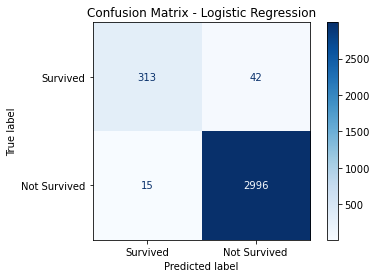

<Figure size 576x432 with 0 Axes>

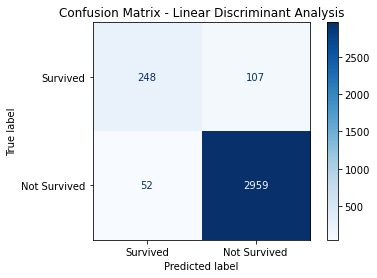

In [109]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Plot confusion matrix for logistic regression model
plt.figure(figsize=(8, 6))
plot_confusion_matrix(logreg, X_test, y_test, display_labels=['Survived', 'Not Survived'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Logistic Regression')
plt.show()

# Plot confusion matrix for LDA model
plt.figure(figsize=(8, 6))
plot_confusion_matrix(lda, X_test, y_test, display_labels=['Survived', 'Not Survived'], cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Linear Discriminant Analysis')
plt.show()

In [110]:
from sklearn.metrics import confusion_matrix

# Get the confusion matrix for logistic regression model
cm_logreg = confusion_matrix(y_test, logreg.predict(X_test))

# Calculate true positive, false positive, true negative, and false negative rates for logistic regression
tn_logreg, fp_logreg, fn_logreg, tp_logreg = cm_logreg.ravel()
tpr_logreg = tp_logreg / (tp_logreg + fn_logreg)
fpr_logreg = fp_logreg / (fp_logreg + tn_logreg)
tnr_logreg = tn_logreg / (tn_logreg + fp_logreg)
fnr_logreg = fn_logreg / (fn_logreg + tp_logreg)

# Get the confusion matrix for LDA model
cm_lda = confusion_matrix(y_test, lda.predict(X_test))

# Calculate true positive, false positive, true negative, and false negative rates for LDA
tn_lda, fp_lda, fn_lda, tp_lda = cm_lda.ravel()
tpr_lda = tp_lda / (tp_lda + fn_lda)
fpr_lda = fp_lda / (fp_lda + tn_lda)
tnr_lda = tn_lda / (tn_lda + fp_lda)
fnr_lda = fn_lda / (fn_lda + tp_lda)

# Print the rates for logistic regression
print("Logistic Regression:")
print("True Positive Rate (TPR):", tpr_logreg.round(4))
print("False Positive Rate (FPR):", fpr_logreg.round(4))
print("True Negative Rate (TNR):", tnr_logreg.round(4))
print("False Negative Rate (FNR):", fnr_logreg.round(4))
print()

# Print the rates for LDA
print("Linear Discriminant Analysis (LDA):")
print("True Positive Rate (TPR):", tpr_lda.round(4))
print("False Positive Rate (FPR):", fpr_lda.round(4))
print("True Negative Rate (TNR):", tnr_lda.round(4))
print("False Negative Rate (FNR):", fnr_lda.round(4))


Logistic Regression:
True Positive Rate (TPR): 0.995
False Positive Rate (FPR): 0.1183
True Negative Rate (TNR): 0.8817
False Negative Rate (FNR): 0.005

Linear Discriminant Analysis (LDA):
True Positive Rate (TPR): 0.9827
False Positive Rate (FPR): 0.3014
True Negative Rate (TNR): 0.6986
False Negative Rate (FNR): 0.0173


- Based on the confusion matrix output, Here are some inferences based on the calculated rates:

1. True Positive Rate (TPR):
   - Logistic Regression: The logistic regression model has a high TPR of 0.995, indicating that it correctly predicts the "Survived" class with a high accuracy.
   - Linear Discriminant Analysis: The LDA model also performs well with a TPR of 0.9827, indicating a high rate of correctly predicting the "Survived" class.

2. False Positive Rate (FPR):
   - Logistic Regression: The logistic regression model has a relatively low FPR of 0.1183, suggesting that it has a good ability to avoid false alarms or incorrectly predicting the "Not Survived" class.
   - Linear Discriminant Analysis: The LDA model has a higher FPR of 0.3014, indicating a higher tendency to falsely predict the "Not Survived" class.

3. True Negative Rate (TNR):
   - Logistic Regression: The logistic regression model has a TNR of 0.8817, indicating a high rate of correctly predicting the "Not Survived" class.
   - Linear Discriminant Analysis: The LDA model has a lower TNR of 0.6986, suggesting a lower rate of correctly predicting the "Not Survived" class.

4. False Negative Rate (FNR):
   - Logistic Regression: The logistic regression model has a very low FNR of 0.005, implying a low rate of incorrectly predicting the "Survived" class.
   - Linear Discriminant Analysis: The LDA model also has a relatively low FNR of 0.0173, indicating a good ability to avoid falsely predicting the "Survived" class.

- Based on these rates, the logistic regression model generally performs better than the LDA model in terms of accurately predicting both the "Survived" and "Not Survived" classes. The logistic regression model exhibits a higher TPR, lower FPR, higher TNR, and lower FNR compared to the LDA model.

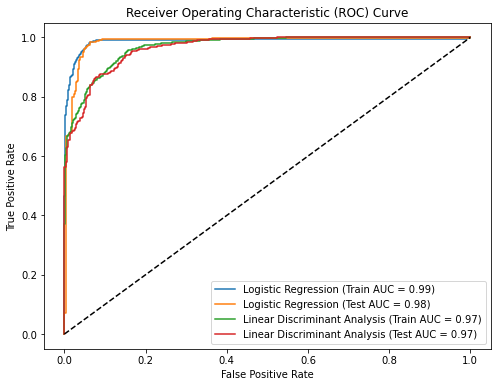

In [111]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# ROC curve for train set
train_probs_logreg = logreg.predict_proba(X_train)[:, 1]
train_fpr_logreg, train_tpr_logreg, _ = roc_curve(y_train, train_probs_logreg)
train_auc_logreg = roc_auc_score(y_train, train_probs_logreg)

train_probs_lda = lda.predict_proba(X_train)[:, 1]
train_fpr_lda, train_tpr_lda, _ = roc_curve(y_train, train_probs_lda)
train_auc_lda = roc_auc_score(y_train, train_probs_lda)

# ROC curve for test set
test_probs_logreg = logreg.predict_proba(X_test)[:, 1]
test_fpr_logreg, test_tpr_logreg, _ = roc_curve(y_test, test_probs_logreg)
test_auc_logreg = roc_auc_score(y_test, test_probs_logreg)

test_probs_lda = lda.predict_proba(X_test)[:, 1]
test_fpr_lda, test_tpr_lda, _ = roc_curve(y_test, test_probs_lda)
test_auc_lda = roc_auc_score(y_test, test_probs_lda)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(train_fpr_logreg, train_tpr_logreg, label='Logistic Regression (Train AUC = {:.2f})'.format(train_auc_logreg))
plt.plot(test_fpr_logreg, test_tpr_logreg, label='Logistic Regression (Test AUC = {:.2f})'.format(test_auc_logreg))
plt.plot(train_fpr_lda, train_tpr_lda, label='Linear Discriminant Analysis (Train AUC = {:.2f})'.format(train_auc_lda))
plt.plot(test_fpr_lda, test_tpr_lda, label='Linear Discriminant Analysis (Test AUC = {:.2f})'.format(test_auc_lda))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

- Based on the  AUC scores for the logistic regression and linear discriminant analysis (LDA) models:

1. Logistic Regression:
   - Train AUC: 0.99
   - Test AUC: 0.98

2. LDA:
   - Train AUC: 0.97
   - Test AUC: 0.97

- Here are some potential business inferences:

1. Discriminative Power:
   - Logistic Regression: The logistic regression model demonstrates strong discriminative power in both the train and test sets, as indicated by high AUC scores of 0.99 and 0.98, respectively.
   - LDA: The LDA model also exhibits good discriminative power with AUC scores of 0.97 for both the train and test sets.

2. Overfitting:
   - Logistic Regression: The logistic regression model shows consistent performance between the train and test sets, with a slightly higher AUC score in the train set. This suggests that the model generalizes well and does not appear to be overfitting the training data.
   - LDA: Similarly, the LDA model demonstrates comparable AUC scores between the train and test sets, indicating a reasonable level of generalization without significant overfitting.

3. Comparative Performance:
   - Logistic Regression vs. LDA: In terms of AUC scores, the logistic regression model performs slightly better than the LDA model in both the train and test sets.
   - However, the difference in AUC scores between the two models is relatively small, suggesting that both models have reasonable discriminatory capabilities.

4. Model Selection:
   - Based on the AUC scores alone, the logistic regression model may be preferred over LDA due to its slightly higher AUC scores.